<a href="https://colab.research.google.com/github/lailatulbadriyah24/2141720036-machine-learning-2023/blob/main/tugas-praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Lailatul Badriyah

Kelas: TI-3H

Absen: 14

NIM: 2141720036


---



# **Tugas**
- Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.
- Buatlah model CNN untuk klasifikasi dataset MNIST.

## **Jawaban**

### **Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**

### **Langkah 1 - Load Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **Langkah 2 - Unduh Dataset CIFAR**

In [24]:
# memuat dataset CIFAR-10, dataset terdiri dari dua bagian, yaitu data pelatihan (train_images dan train_labels) dan data pengujian (test_images dan test_labels).
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalisasi nilai piksel gambar dalam data pelatihan dan data pengujian agar berada dalam rentang 0 hingga 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### **Langkah 3 - Verifikasi Data**

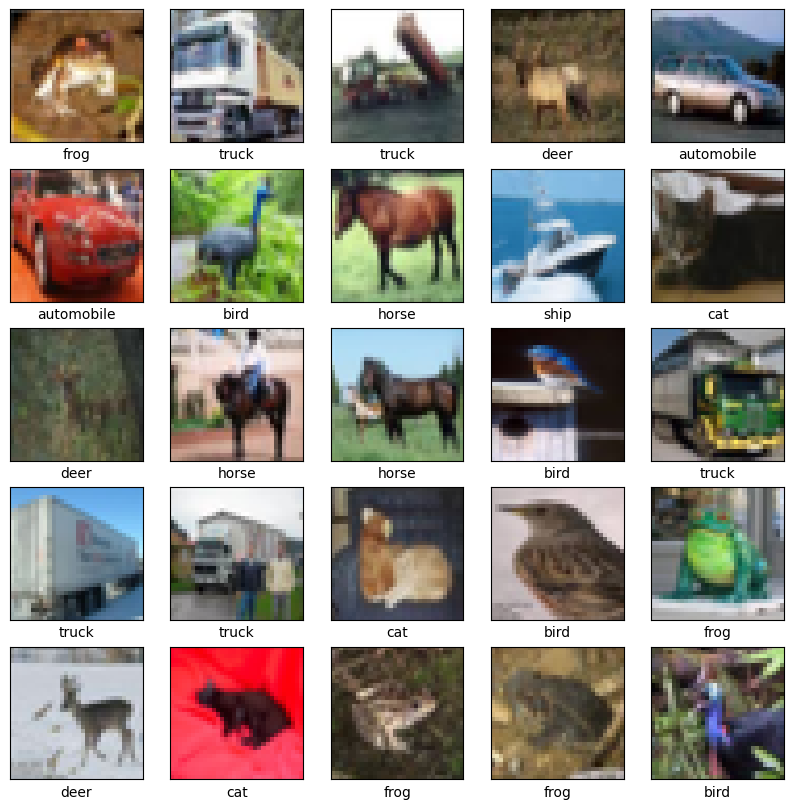

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### **Langkah 4 - Buat Model CNN**

In [3]:
# membuat model sequential
model = models.Sequential()

# lapisan konvolusi 1
model.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # ormalisasi Batch untuk stabilisasi dan percepatan pelatihan
# lapisan konvolusi 2
model.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # lapisan MaxPooling untuk mengurangi dimensi gambar
model.add(layers.Dropout(0.2))  # dropout untuk mengurangi overfitting

# lapisan konvolusi 3
model.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# lapisan konvolusi 4
model.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# lapisan konvolusi 5
model.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# lapisan konvolusi 6
model.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.35))

# lapisan flatten untuk meratakan output dari lapisan konvolusi
model.add(layers.Flatten())

# dapisan dense 1
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# lapisan dense 2 (Output Layer) dengan fungsi aktivasi softmax untuk klasifikasi multi-kelas
model.add(layers.Dense(10, activation='softmax'))

# menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

### **Langkah 5 - Compile Model CNN**

In [4]:
model.compile(
    optimizer='adam', # pengoptimal menggunakan algoritma Adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # fungsi kerugian untuk klasifikasi multi-kelas
    metrics=['accuracy'] # metrik evaluasi yang digunakan adalah akurasi
)

### **Langkah 6 - Fit Model**

In [5]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 50s 22ms/step - loss: 1.5770 - accuracy: 0.4580 - val_loss: 1.3098 - val_accuracy: 0.5611
Epoch 2/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9475 - accuracy: 0.6689 - val_loss: 0.8063 - val_accuracy: 0.7209
Epoch 3/20
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7595 - accuracy: 0.7390 - val_loss: 0.7588 - val_accuracy: 0.7386
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6532 - accuracy: 0.7787 - val_loss: 0.6806 - val_accuracy: 0.7747
Epoch 5/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5648 - accuracy: 0.8070 - val_loss: 1.1094 - val_accuracy: 0.6383
Epoch 6/20
1563/1563 [==============================] - 38s 24ms/step - loss: 0.4902 - accuracy: 0.8340 - val_loss: 0.5630 - val_accuracy: 0.8092
Epoch 7/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4297 - accuracy: 0.8538 - val_loss: 0.4959 - val_accura

### **Langkah 7 - Evaluasi Model**

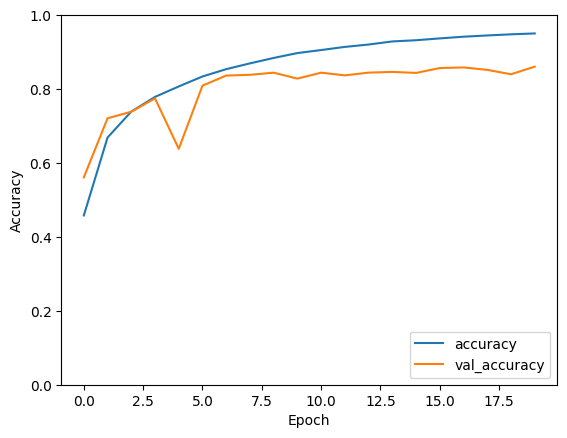

In [6]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### **Langkah 8 - Cetak Hasil Akurasi**

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - loss: 0.5420 - accuracy: 0.8606 - 2s/epoch - 6ms/step
Test accuracy: 0.8605999946594238




---


### **Buatlah model CNN untuk klasifikasi dataset MNIST.**

### **Langkah 1 - Unduh Dataset MNIST**

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


## **Tanpa PCA**

### **Langkah 2 - Buat Model CNN**

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### **Langkah 3 - Compile Model CNN**

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **Langkah 4 - Fit Model**

In [11]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1449 - accuracy: 0.9557 - val_loss: 0.0553 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0351 - val_accuracy: 0.9896
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.0248 - val_accuracy: 0.9916
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0285 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0373 - val_accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0268 - val_accuracy

### **Langkah 5 - Evaluasi Model**

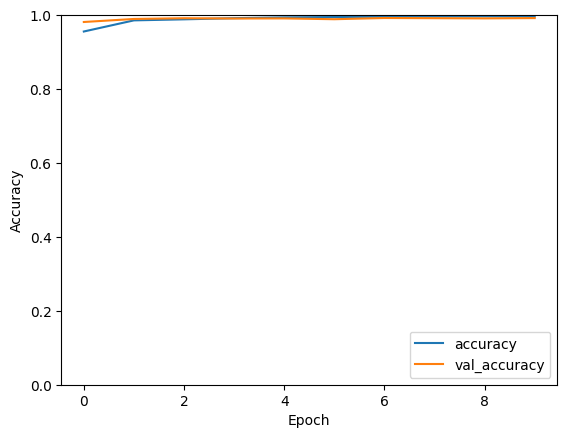

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### **Langkah 6 - Cetak Hasil Akurasi**

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0354 - accuracy: 0.9920 - 1s/epoch - 3ms/step
Test accuracy: 0.9919999837875366


## **Menggunakan PCA**

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# PCA
all_images = np.concatenate((train_images, test_images), axis=0)
flat_images = all_images.reshape((len(all_images), -1))

scaler = StandardScaler()
scaled_images = scaler.fit_transform(flat_images)

num_components = 50
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_images)

train_pca, test_pca = pca_result[:len(train_images)], pca_result[len(train_images):]

# Model with PCA
model_pca = models.Sequential()
model_pca.add(layers.Dense(64, activation='relu', input_shape=(num_components,)))
model_pca.add(layers.Dense(10, activation='softmax'))

model_pca.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Model training with PCA
history_pca = model_pca.fit(train_pca, train_labels, epochs=10, validation_data=(test_pca, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 0.3958 - accuracy: 0.8857 - val_loss: 0.2125 - val_accuracy: 0.9355
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1827 - accuracy: 0.9452 - val_loss: 0.1622 - val_accuracy: 0.9512
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1443 - accuracy: 0.9564 - val_loss: 0.1468 - val_accuracy: 0.9564
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1247 - accuracy: 0.9620 - val_loss: 0.1365 - val_accuracy: 0.9594
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1098 - accuracy: 0.9665 - val_loss: 0.1229 - val_accuracy: 0.9632
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1037 - accuracy: 0.9685 - val_loss: 0.1210 - val_accuracy: 0.9645
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0945 - accuracy: 0.9713 - val_loss: 0.1255 - val_accuracy: 0.9648
Epo

### **Evaluasi Model With PCA**

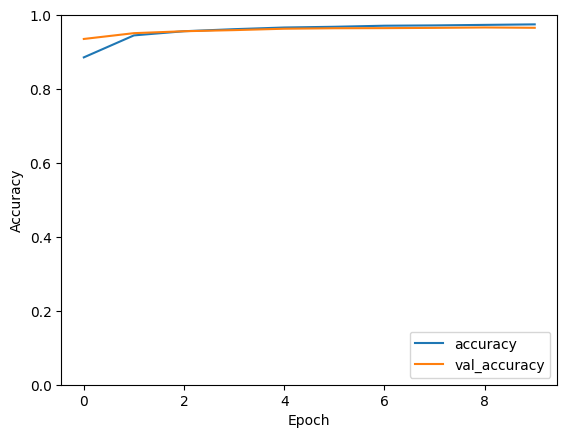

In [21]:
plt.plot(history_pca.history['accuracy'], label='accuracy')
plt.plot(history_pca.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### **Cetak Hasil Akurasi With PCA**

In [22]:
test_loss, test_acc = model_pca.evaluate(test_pca, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.1192 - accuracy: 0.9657 - 768ms/epoch - 2ms/step
Test accuracy: 0.9656999707221985
